## PPO Success Rate Evaluation

In [ ]:
from environment3 import LifeStyleEnv
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from sb3_contrib.common.maskable.utils import get_action_masks
import numpy as np
from sb3_contrib import MaskablePPO

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(days_per_episode=365)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True)
    return env

eval_env = make_env(is_eval=True)
model = MaskablePPO.load("logs/ppo/ppo_best_model_fined_tuned2/best_model.zip")

print("Starting Final Evaluation...")

n_eval_episodes = 100 
successes = []
episode_rewards = []

for episode in range(n_eval_episodes):
    obs, info = eval_env.reset(randomized=True)
    unwrapped_env = eval_env.unwrapped

    print(f"Episode {episode+1}: starting weight = {unwrapped_env.state['current_weight_kg']:.2f} kg")

    done = False
    total_reward = 0
    reached_target = False

    while not done:
        action_masks = get_action_masks(unwrapped_env)
        action, _ = model.predict(obs, deterministic=True, action_masks=action_masks)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        total_reward += reward
        done = terminated or truncated

        # Check for success: terminated due to reaching target BMI
        if terminated and abs(unwrapped_env.state["current_bmi"] - unwrapped_env.target_bmi) < 0.25:
            reached_target = True

    successes.append(1 if reached_target else 0)
    episode_rewards.append(total_reward)

success_rate = np.mean(successes)
mean_reward = np.mean(episode_rewards)
std_reward = np.std(episode_rewards)

print(f"Success rate: {success_rate*100:.2f}%")
print(f"Mean reward: {mean_reward:.2f}")
print(f"Reward std deviation: {std_reward:.2f}")


Starting Final Evaluation...
Episode 1: starting weight = 61.80 kg
Episode 2: starting weight = 113.90 kg
Episode 3: starting weight = 104.68 kg
Episode 4: starting weight = 62.90 kg
Episode 5: starting weight = 106.77 kg
Episode 6: starting weight = 37.09 kg
Episode 7: starting weight = 74.61 kg
Episode 8: starting weight = 111.53 kg
Episode 9: starting weight = 69.96 kg
Episode 10: starting weight = 79.58 kg
Episode 11: starting weight = 113.12 kg
Episode 12: starting weight = 101.09 kg
Episode 13: starting weight = 75.29 kg
Episode 14: starting weight = 98.82 kg
Episode 15: starting weight = 47.49 kg
Episode 16: starting weight = 42.69 kg
Episode 17: starting weight = 48.91 kg
Episode 18: starting weight = 98.77 kg
Episode 19: starting weight = 62.48 kg
Episode 20: starting weight = 90.44 kg
Episode 21: starting weight = 109.26 kg
Episode 22: starting weight = 68.00 kg
Episode 23: starting weight = 84.27 kg
Episode 24: starting weight = 90.45 kg
Episode 25: starting weight = 39.20 k

## A2C Succeess Rate Evaluation 

In [ ]:
from environment3 import LifeStyleEnv
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from sb3_contrib.common.maskable.utils import get_action_masks
import numpy as np
from MaskableA2C import MaskableA2C

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(days_per_episode=365)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True)
    return env

eval_env = make_env(is_eval=True)
model = MaskableA2C.load("logs/a2c/a2c_best_model/best_model.zip")

print("Starting Final Evaluation...")

n_eval_episodes = 100 
successes = []
episode_rewards = []

for episode in range(n_eval_episodes):
    obs, info = eval_env.reset(randomized=True)
    unwrapped_env = eval_env.unwrapped

    print(f"Episode {episode+1}: starting weight = {unwrapped_env.state['current_weight_kg']:.2f} kg")

    done = False
    total_reward = 0
    reached_target = False

    while not done:
        action_masks = get_action_masks(unwrapped_env)
        action, _ = model.predict(obs, deterministic=True, action_masks=action_masks)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        total_reward += reward
        done = terminated or truncated

        # Check for success: terminated due to reaching target BMI
        if terminated and abs(unwrapped_env.state["current_bmi"] - unwrapped_env.target_bmi) < 0.25:
            reached_target = True

    successes.append(1 if reached_target else 0)
    episode_rewards.append(total_reward)

success_rate = np.mean(successes)
mean_reward = np.mean(episode_rewards)
std_reward = np.std(episode_rewards)

print(f"Success rate: {success_rate*100:.2f}%")
print(f"Mean reward: {mean_reward:.2f}")
print(f"Reward std deviation: {std_reward:.2f}")


Starting Final Evaluation...
Episode 1: starting weight = 76.87 kg
Episode 2: starting weight = 113.71 kg
Episode 3: starting weight = 111.27 kg
Episode 4: starting weight = 67.27 kg
Episode 5: starting weight = 72.94 kg
Episode 6: starting weight = 59.25 kg
Episode 7: starting weight = 106.90 kg
Episode 8: starting weight = 45.75 kg
Episode 9: starting weight = 53.26 kg
Episode 10: starting weight = 52.47 kg
Episode 11: starting weight = 74.52 kg
Episode 12: starting weight = 54.29 kg
Episode 13: starting weight = 69.07 kg
Episode 14: starting weight = 95.63 kg
Episode 15: starting weight = 87.06 kg
Episode 16: starting weight = 76.80 kg
Episode 17: starting weight = 62.82 kg
Episode 18: starting weight = 105.96 kg
Episode 19: starting weight = 50.77 kg
Episode 20: starting weight = 80.34 kg
Episode 21: starting weight = 86.87 kg
Episode 22: starting weight = 40.55 kg
Episode 23: starting weight = 94.58 kg
Episode 24: starting weight = 72.60 kg
Episode 25: starting weight = 95.87 kg
E

## DQN Success Rate Evaluation

In [ ]:
from environment3 import LifeStyleEnv
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
import numpy as np
from stable_baselines3 import DQN

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(days_per_episode = 365)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True)
    return env

eval_env = make_env(is_eval=True)
model = DQN.load("logs/dqn/dqn_best_model_fined_tuned5/best_model.zip")

print("Starting Final Evaluation...")

n_eval_episodes = 100 
successes = []
episode_rewards = []

for episode in range(n_eval_episodes):
    obs, info = eval_env.reset(randomized=True)
    unwrapped_env = eval_env.unwrapped

    print(f"Episode {episode+1}: starting weight = {unwrapped_env.state['current_weight_kg']:.2f} kg")

    done = False
    total_reward = 0
    reached_target = False

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        total_reward += reward
        done = terminated or truncated

        # Check for success: terminated due to reaching target BMI
        if terminated and abs(unwrapped_env.state["current_bmi"] - unwrapped_env.target_bmi) < 0.25:
            reached_target = True

    successes.append(1 if reached_target else 0)
    episode_rewards.append(total_reward)

success_rate = np.mean(successes)
mean_reward = np.mean(episode_rewards)
std_reward = np.std(episode_rewards)

print(f"Success rate: {success_rate*100:.2f}%")
print(f"Mean reward: {mean_reward:.2f}")
print(f"Reward std deviation: {std_reward:.2f}")


Starting Final Evaluation...
Episode 1: starting weight = 79.75 kg
Episode 2: starting weight = 69.94 kg
Episode 3: starting weight = 44.35 kg
Episode 4: starting weight = 94.52 kg
Episode 5: starting weight = 56.39 kg
Episode 6: starting weight = 68.87 kg
Episode 7: starting weight = 80.40 kg
Episode 8: starting weight = 78.15 kg
Episode 9: starting weight = 74.99 kg
Episode 10: starting weight = 112.98 kg
Episode 11: starting weight = 89.52 kg
Episode 12: starting weight = 85.57 kg
Episode 13: starting weight = 40.67 kg
Episode 14: starting weight = 60.25 kg
Episode 15: starting weight = 93.28 kg
Episode 16: starting weight = 87.47 kg
Episode 17: starting weight = 38.11 kg
Episode 18: starting weight = 68.89 kg
Episode 19: starting weight = 54.16 kg
Episode 20: starting weight = 78.17 kg
Episode 21: starting weight = 56.01 kg
Episode 22: starting weight = 110.29 kg
Episode 23: starting weight = 88.39 kg
Episode 24: starting weight = 71.33 kg
Episode 25: starting weight = 43.09 kg
Epi

## Dyna-Q Success Rate Evaluation

In [ ]:
from dyna_q_lifestyle import DynaQLifestyle
import numpy as np

# Load the Q-table
q_path = "saved_models/dyna_q_final_best.json"
Q = DynaQLifestyle.load_q(q_path)

n_eval_episodes = 100
successes = []
episode_rewards = []
starting_weights = []

height_cm = 170
target_bmi = 21.75

for ep in range(n_eval_episodes):
    # Run one episode using Dyna-Q
    rows, total_reward, _ = DynaQLifestyle.run_episode(
        Q,
        seed=69,  
        initial_weight_kg=None,             
        days_per_episode=365
    )
    
    # Extract starting weight from first row
    start_bmi = float(rows[0][5])  # BMI is column 5
    start_weight_kg = start_bmi * (height_cm / 100) ** 2
    starting_weights.append(start_weight_kg)
    
    # Print only starting weight
    print(f"Episode {ep+1}: starting weight = {start_weight_kg:.2f} kg")

    # Determine if target BMI was reached
    reached_target = any(abs(float(row[5]) - target_bmi) < 0.25 for row in rows)
    successes.append(1 if reached_target else 0)
    episode_rewards.append(total_reward)

# Metrics summary
success_rate = np.mean(successes)
mean_reward = np.mean(episode_rewards)
std_reward = np.std(episode_rewards)

print("\n=== Evaluation Summary ===")
print(f"Success rate: {success_rate*100:.2f}%")
print(f"Mean reward: {mean_reward:.2f}")
print(f"Reward std deviation: {std_reward:.2f}")
print(f"Starting weight stats: min={np.min(starting_weights):.2f}, max={np.max(starting_weights):.2f}, mean={np.mean(starting_weights):.2f}")


2025-09-05 16:46:59.337365: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-05 16:46:59.380293: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-05 16:47:00.332113: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Episode 1: starting weight = 60.08 kg
Episode 2: starting weight = 70.20 kg
Episode 3: starting weight = 58.90 kg
Episode 4: starting weight = 104.82 kg
Episode 5: starting weight = 103.29 kg
Episode 6: starting weight = 47.37 kg
Episode 7: starting weight = 61.21 kg
Episode 8: starting weight = 48.78 kg
Episode 9: starting weight = 68.78 kg
Episode 10: starting weight = 100.46 kg
Episode 11: starting weight = 91.99 kg
Episode 12: starting weight = 71.61 kg
Episode 13: starting weight = 67.22 kg
Episode 14: starting weight = 100.37 kg
Episode 15: starting weight = 90.77 kg
Episode 16: starting weight = 40.81 kg
Episode 17: starting weight = 111.47 kg
Episode 18: starting weight = 37.63 kg
Episode 19: starting weight = 97.86 kg
Episode 20: starting weight = 62.22 kg
Episode 21: starting weight = 47.28 kg
Episode 22: starting weight = 92.91 kg
Episode 23: starting weight = 49.16 kg
Episode 24: starting weight = 71.27 kg
Episode 25: starting weight = 110.60 kg
Episode 26: starting weight 

## Success Rate of All Algorithm

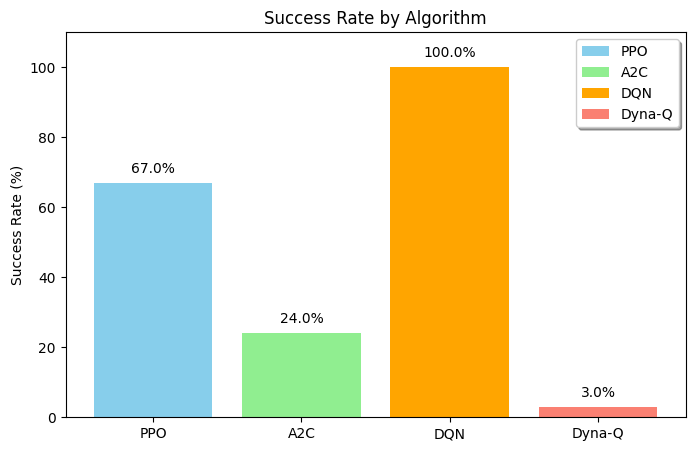

In [7]:
import matplotlib.pyplot as plt

all_algo_success_rate = {
    "PPO": 67.00,
    "A2C": 24.00,
    "DQN": 100.00,
    "Dyna-Q": 3.00,
}

algorithms = list(all_algo_success_rate.keys())
success_rates = list(all_algo_success_rate.values())
colors = ['skyblue', 'lightgreen', 'orange', 'salmon']


plt.figure(figsize=(8,5))
bars = plt.bar(algorithms, success_rates, color=colors)
plt.ylim(0, 110)
plt.ylabel("Success Rate (%)")
plt.title("Success Rate by Algorithm")

plt.legend(bars, algorithms, loc='upper right', frameon=True, shadow=True)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        yval + 2,  
        f"{yval:.1f}%",
        ha='center', 
        va='bottom',
    )

plt.show()


## Average Length of Episode

### DQN 

In [ ]:
from environment3 import LifeStyleEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import DQN
import numpy as np

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(days_per_episode=365)
    env = Monitor(env)
    return env

n_eval_episodes = 100

eval_env = make_env(is_eval=True)
model = DQN.load("logs/dqn/dqn_best_model_fined_tuned5/best_model.zip")

episode_lengths = []

for episode in range(n_eval_episodes):
    obs, info = eval_env.reset(randomized=True)
    unwrapped_env = eval_env.unwrapped
    print(f"Episode {episode+1}: starting weight = {unwrapped_env.state['current_weight_kg']:.2f} kg")
    done = False
    step_count = 0

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        done = terminated or truncated
        step_count += 1

    episode_lengths.append(step_count)

# Compute average and standard deviation
mean_length = np.mean(episode_lengths)

print(f"Average episode length over {n_eval_episodes} episodes: {mean_length:.2f}")

2025-09-05 18:13:26.229767: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-05 18:13:26.282373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-05 18:13:28.066738: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Episode 1: starting weight = 96.09 kg
Episode 2: starting weight = 89.98 kg
Episode 3: starting weight = 102.42 kg
Episode 4: starting weight = 108.17 kg
Episode 5: starting weight = 103.69 kg
Episode 6: starting weight = 110.46 kg
Episode 7: starting weight = 100.96 kg
Episode 8: starting weight = 69.85 kg
Episode 9: starting weight = 83.49 kg
Episode 10: starting weight = 100.34 kg
Episode 11: starting weight = 95.46 kg
Episode 12: starting weight = 74.21 kg
Episode 13: starting weight = 108.38 kg
Episode 14: starting weight = 86.88 kg
Episode 15: starting weight = 104.58 kg
Episode 16: starting weight = 70.66 kg
Episode 17: starting weight = 84.55 kg
Episode 18: starting weight = 41.13 kg
Episode 19: starting weight = 38.29 kg
Episode 20: starting weight = 96.99 kg
Episode 21: starting weight = 90.56 kg
Episode 22: starting weight = 46.57 kg
Episode 23: starting weight = 55.61 kg
Episode 24: starting weight = 114.53 kg
Episode 25: starting weight = 104.32 kg
Episode 26: starting wei

### Dyna-Q

In [4]:
from dyna_q_lifestyle import DynaQLifestyle
import numpy as np

# Load Q-table
Q = DynaQLifestyle.load_q("saved_models/dyna_q_final_best.json")

n_eval_episodes = 100
episode_lengths = []

height_cm = 170
target_bmi = 21.75
starting_weights = []

for ep in range(n_eval_episodes):
    rows, total_reward, _ = DynaQLifestyle.run_episode(
        Q,
        initial_weight_kg=None,
        days_per_episode=365
    )

    start_bmi = float(rows[0][5])  # BMI is column 5
    start_weight_kg = start_bmi * (height_cm / 100) ** 2
    starting_weights.append(start_weight_kg)
    
    print(f"Episode {ep+1}: starting weight = {start_weight_kg:.2f} kg")
    
    # Length of episode = number of steps
    episode_lengths.append(len(rows))

mean_length = np.mean(episode_lengths)
std_length = np.std(episode_lengths)

print(f"Average episode length: {mean_length:.2f} steps")

Episode 1: starting weight = 46.88 kg
Episode 2: starting weight = 48.64 kg
Episode 3: starting weight = 104.33 kg
Episode 4: starting weight = 60.92 kg
Episode 5: starting weight = 100.83 kg
Episode 6: starting weight = 61.67 kg
Episode 7: starting weight = 48.38 kg
Episode 8: starting weight = 58.70 kg
Episode 9: starting weight = 56.01 kg
Episode 10: starting weight = 39.39 kg
Episode 11: starting weight = 56.67 kg
Episode 12: starting weight = 74.42 kg
Episode 13: starting weight = 73.26 kg
Episode 14: starting weight = 102.31 kg
Episode 15: starting weight = 73.93 kg
Episode 16: starting weight = 55.11 kg
Episode 17: starting weight = 43.41 kg
Episode 18: starting weight = 89.68 kg
Episode 19: starting weight = 40.98 kg
Episode 20: starting weight = 110.60 kg
Episode 21: starting weight = 49.79 kg
Episode 22: starting weight = 111.67 kg
Episode 23: starting weight = 39.22 kg
Episode 24: starting weight = 88.12 kg
Episode 25: starting weight = 96.90 kg
Episode 26: starting weight =

### PPO

In [1]:
from environment3 import LifeStyleEnv
from stable_baselines3.common.monitor import Monitor
import numpy as np
from sb3_contrib.common.maskable.utils import get_action_masks
from sb3_contrib import MaskablePPO
from MaskableA2C import MaskableA2C
from stable_baselines3.common.env_checker import check_env

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(days_per_episode = 365)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True)
    return env

n_eval_episodes = 100

eval_env = make_env(is_eval=True)
model = MaskablePPO.load("logs/ppo/ppo_best_model_fined_tuned2/best_model.zip")

episode_lengths = []

for episode in range(n_eval_episodes):
    obs, info = eval_env.reset(randomized=True)
    unwrapped_env = eval_env.unwrapped
    print(f"Episode {episode+1}: starting weight = {unwrapped_env.state['current_weight_kg']:.2f} kg")
    done = False
    step_count = 0

    while not done:
        action_masks = get_action_masks(unwrapped_env)
        action, _ = model.predict(obs, deterministic=True, action_masks=action_masks)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        done = terminated or truncated
        step_count += 1

    episode_lengths.append(step_count)

# Compute average
mean_length = np.mean(episode_lengths)

print(f"Average episode length over {n_eval_episodes} episodes: {mean_length:.2f}")

2025-09-05 18:22:29.034492: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-05 18:22:29.081863: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-05 18:22:30.041988: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Episode 1: starting weight = 36.15 kg
Episode 2: starting weight = 53.64 kg
Episode 3: starting weight = 56.69 kg
Episode 4: starting weight = 70.40 kg
Episode 5: starting weight = 51.17 kg
Episode 6: starting weight = 35.89 kg
Episode 7: starting weight = 96.51 kg
Episode 8: starting weight = 43.57 kg
Episode 9: starting weight = 109.84 kg
Episode 10: starting weight = 99.28 kg
Episode 11: starting weight = 45.76 kg
Episode 12: starting weight = 64.64 kg
Episode 13: starting weight = 48.98 kg
Episode 14: starting weight = 80.51 kg
Episode 15: starting weight = 101.11 kg
Episode 16: starting weight = 74.28 kg
Episode 17: starting weight = 62.13 kg
Episode 18: starting weight = 98.23 kg
Episode 19: starting weight = 56.04 kg
Episode 20: starting weight = 107.39 kg
Episode 21: starting weight = 63.07 kg
Episode 22: starting weight = 38.24 kg
Episode 23: starting weight = 72.97 kg
Episode 24: starting weight = 37.32 kg
Episode 25: starting weight = 82.97 kg
Episode 26: starting weight = 5

### A2C

In [2]:
from environment3 import LifeStyleEnv
from stable_baselines3.common.monitor import Monitor
import numpy as np
from sb3_contrib.common.maskable.utils import get_action_masks
from MaskableA2C import MaskableA2C
from stable_baselines3.common.env_checker import check_env

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(days_per_episode = 365)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True)
    return env

n_eval_episodes = 100

eval_env = make_env(is_eval=True)
model = MaskableA2C.load("logs/a2c/a2c_best_model/best_model.zip")

episode_lengths = []

for episode in range(n_eval_episodes):
    obs, info = eval_env.reset(randomized=True)
    unwrapped_env = eval_env.unwrapped
    print(f"Episode {episode+1}: starting weight = {unwrapped_env.state['current_weight_kg']:.2f} kg")
    done = False
    step_count = 0

    while not done:
        action_masks = get_action_masks(unwrapped_env)
        action, _ = model.predict(obs, deterministic=True, action_masks=action_masks)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        done = terminated or truncated
        step_count += 1

    episode_lengths.append(step_count)

# Compute average 
mean_length = np.mean(episode_lengths)

print(f"Average episode length over {n_eval_episodes} episodes: {mean_length:.2f}")

Episode 1: starting weight = 108.43 kg
Episode 2: starting weight = 82.80 kg
Episode 3: starting weight = 79.66 kg
Episode 4: starting weight = 99.68 kg
Episode 5: starting weight = 50.46 kg
Episode 6: starting weight = 78.51 kg
Episode 7: starting weight = 89.89 kg
Episode 8: starting weight = 48.62 kg
Episode 9: starting weight = 95.89 kg
Episode 10: starting weight = 40.52 kg
Episode 11: starting weight = 70.11 kg
Episode 12: starting weight = 66.97 kg
Episode 13: starting weight = 66.82 kg
Episode 14: starting weight = 110.59 kg
Episode 15: starting weight = 85.80 kg
Episode 16: starting weight = 62.38 kg
Episode 17: starting weight = 90.72 kg
Episode 18: starting weight = 98.70 kg
Episode 19: starting weight = 39.48 kg
Episode 20: starting weight = 84.76 kg
Episode 21: starting weight = 113.56 kg
Episode 22: starting weight = 64.42 kg
Episode 23: starting weight = 103.04 kg
Episode 24: starting weight = 70.92 kg
Episode 25: starting weight = 85.07 kg
Episode 26: starting weight = 